In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pickle
from xgboost import XGBRegressor

In [3]:
data = pd.read_csv("../data/processed/warsaw_house_data.csv", index_col=0)

In [4]:
X, y = data.drop("cost", axis=1), data["cost"]

In [5]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5
)
model.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes

In [7]:
y_pred = model.predict(X_val)

In [8]:
print(y_pred[:5])
print(y_val[:5])

[25843.156 18522.984 19721.014 25843.156 25273.287]
5349    51032.26
3011    15817.27
5799    20000.00
1430    24901.96
8791    22258.77
Name: cost, dtype: float64


In [9]:
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"MSE: {mse:.3f}")
print(f"R2: {r2:.3f}\n")

MSE: 35223790.386
R2: 0.394



In [10]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Feature Importance': model.feature_importances_
}).sort_values(by="Feature Importance", ascending=False)

print(coefficients)

           Feature  Feature Importance
4         pharmacy            0.365123
6       attraction            0.283565
12           hotel            0.068056
7          theatre            0.053201
3     bike station            0.044340
0              lat            0.038696
1              lon            0.033331
5              aed            0.032423
8             tree            0.026585
13            dorm            0.019006
2             stop            0.016965
11  police station            0.011236
9             bush            0.007472
10          forest            0.000000


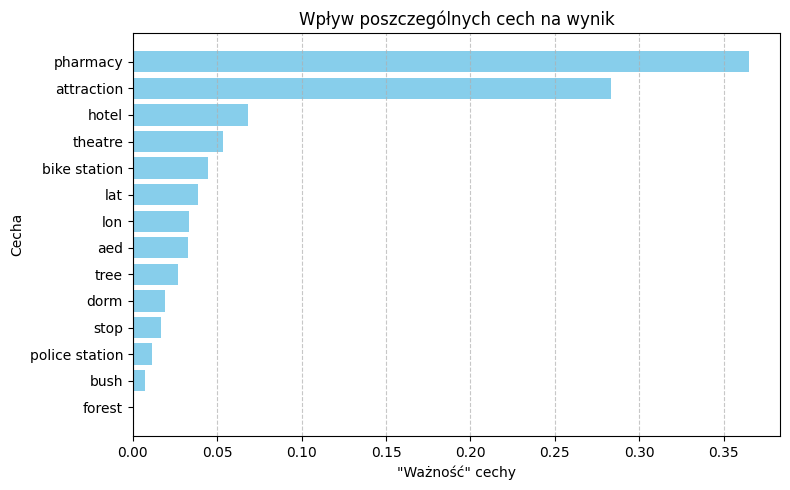

<Figure size 640x480 with 0 Axes>

In [11]:
plt.figure(figsize=(8, 5))
plt.barh(coefficients["Feature"], coefficients["Feature Importance"], color='skyblue')
plt.title("Wpływ poszczególnych cech na wynik")
plt.xlabel('"Ważność" cechy')
plt.ylabel("Cecha")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.savefig("../reports/figures/random_forest_regressor_feature_importance_plot.png")

In [12]:
with open("xgb_regressor.pkl", "wb") as f:
    pickle.dump(model, f)